In [1]:
# Importing the required libraries. Refer to the .yml file for the full conda environment.
import xarray as xr

# Dataset Preparation and Interpolation:

The datasets for this project need to have the same number of grid points and must cover the same time range. Otherwise, comparisons between the datasets will be difficult, if not impossible. So let's load our datasets and begin!

In [2]:
# Set the file paths for both of my datasets: 
# Note: these file paths are for my local computer. Please change them if necessary. 
f_path_GPCP = 'precip.mon.mean.nc'
f_path_ERA5 = 'ERA5 Monthly Averaged on Single Levels [Total Precipitation].nc'

In [3]:
# Load the GPCP Dataset using xarray:
GPCP = xr.load_dataset(f_path_GPCP)
GPCP

<xarray.Dataset> Size: 23MB
Dimensions:    (time: 559, nv: 2, lat: 72, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-07-01
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB 1979-01-01 ... 2025-08-01
    lat_bnds   (lat, nv) float32 576B -90.0 -87.5 -87.5 -85.0 ... 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 1kB 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 23MB 0.0 0.0 0.0 ... 1.98 1.976 1.978
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2025/06 through latest.

In [4]:
# Load the ERA5 Dataset using xarray:
# Note: this one may take some time as the file is large.
ERA5 = xr.load_dataset(f_path_ERA5)
ERA5

<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 1028, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B 0
    expver      (valid_time) <U4 16kB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    tp          (valid_time, latitude, longitude) float32 4GB 0.0004425 ... 0...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

# 1) Time Range: 

The first issue we should tackle is the time range. As you can see below, The ERA5 dataset spans over a longer period of time compared to GPCP. To fix this, we need to find a common time range and then slice both datasets over that common time range. Since GPCP doesn't span as far back as ERA5, we will choose the first time value for GPCP as our starting point. Between the two datasets, July 2025 seems to be a good endpoint. After we slice and define our new dataset, we can free up some RAM by deleting the orginial GPCP and ERA5 datasets as we will no longer be using them. 

In [5]:
# We print the start and end dates for both of our datasets: 
# We want to see what common range should be used for our analysis.
print('GPCP Date Range:')
print(GPCP['time'].min().values)
print(GPCP['time'].max().values)

print('\nERA5 Date Range:')
print(ERA5['valid_time'].min().values)
print(ERA5['valid_time'].max().values)

GPCP Date Range:
1979-01-01T00:00:00.000000000
2025-07-01T00:00:00.000000000

ERA5 Date Range:
1940-01-01T06:00:00.000000000
2025-08-01T06:00:00.000000000


In [6]:
# We slice and define the GPCP Dataset within the common date range:
gpcp = GPCP.sel(time=slice(GPCP['time'].min(), '2025-07'))
gpcp

<xarray.Dataset> Size: 23MB
Dimensions:    (time: 559, nv: 2, lat: 72, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-07-01
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB 1979-01-01 ... 2025-08-01
    lat_bnds   (lat, nv) float32 576B -90.0 -87.5 -87.5 -85.0 ... 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 1kB 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 23MB 0.0 0.0 0.0 ... 1.98 1.976 1.978
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2025/06 through latest.

In [7]:
# We also slice and define the ERA5 Dataset in the common date range:
era5 = ERA5.sel(valid_time=slice(GPCP['time'].min(), '2025-07'))
era5

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 559, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0005'
Data variables:
    tp          (valid_time, latitude, longitude) float32 2GB 0.0002937 ... 0...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
# We free up memory in our computer by deleting the original dataset imports:
# We no longer need these as we will use gpcp and era5 instead.
del GPCP
del ERA5

# 2) Unit Conversions: 

Both of the datasets are measureing different things. GPCP measures the monthly mean precipitation rate in mm/day. Meanwhile, ERA measures the total monthly precipitation in meters. For our project, we will convert both data sets to show the total monthly precipiation in mm. 

For GPCP: $$ Monthly \space Mean \space Precip \space (\frac{mm}{day}) \space \space * \space \space \# \space of \space days \space in \space the \space month = Total \space Monthly \space Precip \space (mm)$$

For ERA5: $$ Total \space Monthly \space Precip \space (m) \space * \frac{1000 mm}{1 m} = Total \space Monthly \space Precip \space (mm)$$

In [9]:
# All of our precipitation data in GPCP is stored in:
gpcp['precip']

<xarray.DataArray 'precip' (time: 559, lat: 72, lon: 144)> Size: 23MB
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.9812404 , 0.9320181 , 0.8138066 , ..., 0.91615057,
         0.811867  , 0.9017285 ],
        [0.7499759 , 0.77453935, 0.67079806, ..., 0.6945452 ,
         0.73984015, 0.7661884 ],
        [0.6614727 , 0.5773457 , 0.617506  , ..., 0.5728163 ,
         0.6059005 , 0.70766836]],

       [[0.33657596, 0.31659493, 0.32447177, ..., 0.2847315 ,
         0.29603544, 0.3030814 ],
        [0.2571579 , 0.28121045, 0.28316426, ..., 0.25939476,
         0.25399455, 0.27813244],
        [0.08254394, 0.10533275, 0.07907505, ..., 0.17585263,
         0.19220772, 0.1084968 ],
...
        [1.0902705 , 1.1033137 , 1.1331    , ..., 1.1095204 ,
         1.0854189 , 1.0772954 ],
        [1.4656366 , 1.4572386 , 1.447009  , ..., 1.4024596 ,
         1.4257805 , 1.4405657 ],
        [1.454721  , 1.4524896 , 1.4454671 , ..., 1.4625052 ,
         1.4617467 , 1.4626079 ]],

       [[0.8522623 , 0.8451007 , 0.8309589 , ..., 0.9013594 ,
         0.8841074 , 0.86594343],
        [0.41467038, 0.40012848, 0.3834885 , ..., 0.4581978 ,
         0.44215176, 0.42500225],
        [0.3739793 , 0.35410553, 0.3185123 , ..., 0.4473965 ,
         0.4099103 , 0.39243275],
        ...,
        [1.1876727 , 1.1617055 , 1.1027906 , ..., 1.2407123 ,
         1.2297794 , 1.2279993 ],
        [1.5146084 , 1.5184649 , 1.5504736 , ..., 1.5376133 ,
         1.5434211 , 1.5205165 ],
        [1.9858338 , 2.0130105 , 2.0607061 , ..., 1.980239  ,
         1.9761238 , 1.9781457 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-07-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]

In [10]:
# Multiply all the values in GPCP by the number of days in the month according to their date values:
gpcp['precip'] = gpcp['precip'] * gpcp['precip'].time.dt.daysinmonth

gpcp['precip']

<xarray.DataArray 'precip' (time: 559, lat: 72, lon: 144)> Size: 46MB
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [30.41845214, 28.89256114, 25.2280044 , ..., 28.40066767,
         25.16787696, 27.95358384],
        [23.24925351, 24.0107199 , 20.79473996, ..., 21.53090149,
         22.93504465, 23.75183988],
        [20.50565302, 17.8977176 , 19.14268684, ..., 17.75730568,
         18.78291631, 21.93771929]],

       [[ 9.42412674,  8.864658  ,  9.08520961, ...,  7.9724822 ,
          8.28899229,  8.48627901],
        [ 7.20042098,  7.87389266,  7.92859936, ...,  7.26305342,
          7.11184752,  7.78770828],
        [ 2.3112303 ,  2.94931713,  2.21410128, ...,  4.92387354,
          5.38181627,  3.0379104 ],
...
        [32.70811558, 33.09941053, 33.99300098, ..., 33.28561306,
         32.56256819, 32.31886268],
        [43.96909833, 43.71715665, 43.41026902, ..., 42.07378864,
         42.77341604, 43.21697116],
        [43.64162922, 43.57468843, 43.36401343, ..., 43.87515664,
         43.85240078, 43.87823582]],

       [[26.42013186, 26.19812173, 25.75972599, ..., 27.94214076,
         27.40732974, 26.84424639],
        [12.85478172, 12.403983  , 11.88814369, ..., 14.20413187,
         13.70670441, 13.17506966],
        [11.59335831, 10.9772715 ,  9.87388101, ..., 13.8692911 ,
         12.70721903, 12.16541523],
        ...,
        [36.81785476, 36.01287031, 34.18650842, ..., 38.46208084,
         38.12316024, 38.06797922],
        [46.95285988, 47.07241261, 48.0646807 , ..., 47.66601145,
         47.84605563, 47.13601196],
        [61.56084669, 62.40332556, 63.8818903 , ..., 61.38741004,
         61.2598381 , 61.32251728]]])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-07-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [11]:
# ERA5 Precipitation data is stored in:
era5['tp']

<xarray.DataArray 'tp' (valid_time: 559, latitude: 721, longitude: 1440)> Size: 2GB
array([[[2.9373169e-04, 2.9373169e-04, 2.9373169e-04, ...,
         2.9373169e-04, 2.9373169e-04, 2.9373169e-04],
        [2.7847290e-04, 2.7847290e-04, 2.7847290e-04, ...,
         2.7847290e-04, 2.7847290e-04, 2.7847290e-04],
        [2.8228760e-04, 2.8228760e-04, 2.8038025e-04, ...,
         2.8228760e-04, 2.8228760e-04, 2.8228760e-04],
        ...,
        [4.3869019e-05, 4.3869019e-05, 4.3869019e-05, ...,
         4.3869019e-05, 4.3869019e-05, 4.3869019e-05],
        [5.1498413e-05, 5.1498413e-05, 5.1498413e-05, ...,
         5.1498413e-05, 5.1498413e-05, 5.1498413e-05],
        [3.8146973e-05, 3.8146973e-05, 3.8146973e-05, ...,
         3.8146973e-05, 3.8146973e-05, 3.8146973e-05]],

       [[1.6021729e-04, 1.6021729e-04, 1.6021729e-04, ...,
         1.6021729e-04, 1.6021729e-04, 1.6021729e-04],
        [1.4305115e-04, 1.4305115e-04, 1.4305115e-04, ...,
         1.4305115e-04, 1.4305115e-04, 1.4305115e-04],
        [1.4114380e-04, 1.4114380e-04, 1.4114380e-04, ...,
         1.4114380e-04, 1.4114380e-04, 1.4114380e-04],
...
        [3.6430359e-04, 3.6430359e-04, 3.6430359e-04, ...,
         3.6239624e-04, 3.6430359e-04, 3.6430359e-04],
        [3.5285950e-04, 3.5285950e-04, 3.5285950e-04, ...,
         3.5285950e-04, 3.5285950e-04, 3.5285950e-04],
        [3.1661987e-04, 3.1661987e-04, 3.1661987e-04, ...,
         3.1661987e-04, 3.1661987e-04, 3.1661987e-04]],

       [[1.2969971e-03, 1.2969971e-03, 1.2969971e-03, ...,
         1.2969971e-03, 1.2969971e-03, 1.2969971e-03],
        [1.3504028e-03, 1.3523102e-03, 1.3523102e-03, ...,
         1.3484955e-03, 1.3504028e-03, 1.3504028e-03],
        [1.3027191e-03, 1.3046265e-03, 1.3046265e-03, ...,
         1.2989044e-03, 1.3008118e-03, 1.3008118e-03],
        ...,
        [2.9373169e-04, 2.9373169e-04, 2.9373169e-04, ...,
         2.9373169e-04, 2.9373169e-04, 2.9373169e-04],
        [2.7084351e-04, 2.7084351e-04, 2.7084351e-04, ...,
         2.7084351e-04, 2.7084351e-04, 2.7084351e-04],
        [2.4795532e-04, 2.4795532e-04, 2.4795532e-04, ...,
         2.4795532e-04, 2.4795532e-04, 2.4795532e-04]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0005'
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [12]:
# Multiply each value by the # of days in the month and 1000 to convert m to mm:
era5['tp'] = era5['tp'] * 1000 * era5['tp'].valid_time.dt.daysinmonth

era5['tp']

<xarray.DataArray 'tp' (valid_time: 559, latitude: 721, longitude: 1440)> Size: 5GB
array([[[ 9.10568237,  9.10568237,  9.10568237, ...,  9.10568237,
          9.10568237,  9.10568237],
        [ 8.63265991,  8.63265991,  8.63265991, ...,  8.63265991,
          8.63265991,  8.63265991],
        [ 8.75091553,  8.75091553,  8.69178772, ...,  8.75091553,
          8.75091553,  8.75091553],
        ...,
        [ 1.35993958,  1.35993958,  1.35993958, ...,  1.35993958,
          1.35993958,  1.35993958],
        [ 1.59645081,  1.59645081,  1.59645081, ...,  1.59645081,
          1.59645081,  1.59645081],
        [ 1.18255615,  1.18255615,  1.18255615, ...,  1.18255615,
          1.18255615,  1.18255615]],

       [[ 4.48608398,  4.48608398,  4.48608398, ...,  4.48608398,
          4.48608398,  4.48608398],
        [ 4.00543213,  4.00543213,  4.00543213, ...,  4.00543213,
          4.00543213,  4.00543213],
        [ 3.95202637,  3.95202637,  3.95202637, ...,  3.95202637,
          3.95202637,  3.95202637],
...
        [10.92910767, 10.92910767, 10.92910767, ..., 10.87188721,
         10.92910767, 10.92910767],
        [10.58578491, 10.58578491, 10.58578491, ..., 10.58578491,
         10.58578491, 10.58578491],
        [ 9.49859619,  9.49859619,  9.49859619, ...,  9.49859619,
          9.49859619,  9.49859619]],

       [[40.20690918, 40.20690918, 40.20690918, ..., 40.20690918,
         40.20690918, 40.20690918],
        [41.86248779, 41.9216156 , 41.9216156 , ..., 41.80335999,
         41.86248779, 41.86248779],
        [40.3842926 , 40.44342041, 40.44342041, ..., 40.26603699,
         40.32516479, 40.32516479],
        ...,
        [ 9.10568237,  9.10568237,  9.10568237, ...,  9.10568237,
          9.10568237,  9.10568237],
        [ 8.39614868,  8.39614868,  8.39614868, ...,  8.39614868,
          8.39614868,  8.39614868],
        [ 7.68661499,  7.68661499,  7.68661499, ...,  7.68661499,
          7.68661499,  7.68661499]]])
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0005'

# 3) Interpolation:

Now that our datasets have a common range, we need to ensure that the grid point structure is the same between the two. Esspecially since GPCP is more coarse than ERA5. Otherwise, there is no clear way to compare grid points between the two datasets. To keep things simple, we will reduce the resolution of the era5 to match the gpcp dataset. 

##### NOTE: You need to ensure that the coordinates and variable names match between the two datasets, otherwise interp_like() may not work properly. 

In [13]:
# We rename the era5 variable and coordinate names to match those in gpcp: 
# # This is required to use the .interp_like() command.
era5 = era5.rename({'tp':'precip'})
era5 = era5.rename({'valid_time':'time'})
era5 = era5.rename({'latitude':'lat'})
era5 = era5.rename({'longitude':'lon'})

era5

<xarray.Dataset> Size: 5GB
Dimensions:  (time: 559, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-07-01T06:...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    number   int64 8B 0
    expver   (time) <U4 9kB '0001' '0001' '0001' '0001' ... '0001' '0001' '0005'
Data variables:
    precip   (time, lat, lon) float64 5GB 9.106 9.106 9.106 ... 7.687 7.687
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
# We reduce the resolution of our dataset by a factor of 10:
# The trim option discards any remainders if a cooridinate is not a factor of 10 (such as the lons).
era5_interp = era5.coarsen(lon=10,boundary='trim').mean().coarsen(lat=10,boundary='trim').mean()

era5_interp

<xarray.Dataset> Size: 46MB
Dimensions:  (time: 559, lat: 72, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-07-01T06:...
  * lat      (lat) float64 576B 88.88 86.38 83.88 81.38 ... -83.62 -86.12 -88.62
  * lon      (lon) float64 1kB -178.9 -176.4 -173.9 -171.4 ... 173.6 176.1 178.6
    number   int64 8B 0
    expver   (time) <U4 9kB '0001' '0001' '0001' '0001' ... '0001' '0001' '0005'
Data variables:
    precip   (time, lat, lon) float64 46MB 8.744 8.623 8.505 ... 7.552 7.724
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

# 4) Longitude Shift:

The final prepwork needed for our datasets is to shift the longitudes. Currently, one data set spans 0 to 360 longitude while the other spans -180 to 180. To keep thing consistent, we will shift the longitude for ERA5 to match GPCP.

In [15]:
# We shift the longitudes by 360 and then resort the values: 
era_shifted = era5_interp.assign_coords(lon=((era5_interp['lon'] + 360) % 360))
era_shifted = era_shifted.sortby(era_shifted['lon'])

era_shifted

<xarray.Dataset> Size: 46MB
Dimensions:  (time: 559, lat: 72, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-07-01T06:...
  * lat      (lat) float64 576B 88.88 86.38 83.88 81.38 ... -83.62 -86.12 -88.62
  * lon      (lon) float64 1kB 1.125 3.625 6.125 8.625 ... 353.6 356.1 358.6
    number   int64 8B 0
    expver   (time) <U4 9kB '0001' '0001' '0001' '0001' ... '0001' '0001' '0005'
Data variables:
    precip   (time, lat, lon) float64 46MB 10.28 10.11 9.93 ... 5.094 5.086 5.07
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

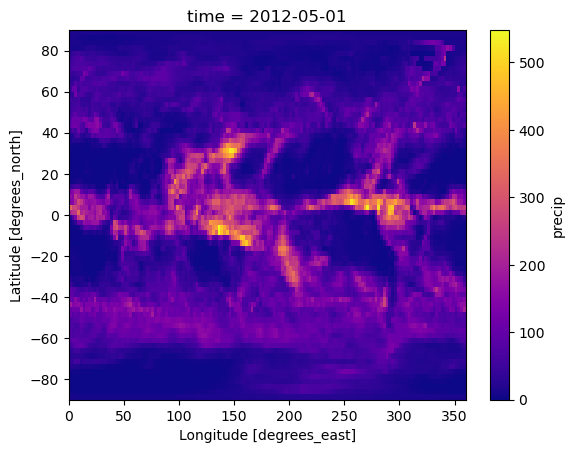

In [16]:
# Double-check to make sure two timesteps in our datasets look comparable:
gpcp['precip'][400].plot(cmap='plasma')

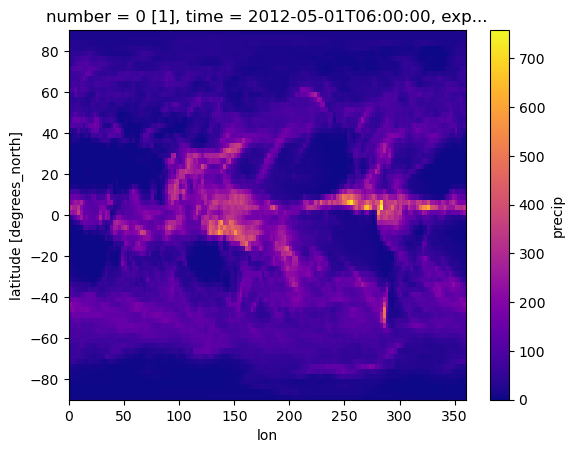

In [17]:
# Plot the same timestep as above in the era5 dataset to verify:
# Seems both of our datasets are matching nicely :)
era_shifted['precip'][400].plot(cmap='plasma')

# 5) Save our Datasets:

Everything has been done and the datasets should resemble each other nicely. To avoid this whole procedure, we can save both of the modified gpcp and the era5 datasets as netCDF files which can be loaded and used by our main project file. That way we can load these files without having to repeat the procedure in this notebook.

In [18]:
# We save our datasets in the netCDF file format:
gpcp.to_netcdf('gpcp.nc')
era_shifted.to_netcdf('era5.nc')